In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as soc 
from sigfig import round
from scipy import constants as const
from scipy.odr import *

In [3]:
#import Oszilloskop daten 
puls1 = np.array(genfromtxt("tab/oszilloskop/puls1.csv", delimiter = ",",skip_header=12))
puls2 = np.array(genfromtxt("tab/oszilloskop/puls2.csv", delimiter = ",",skip_header=12))
s2c3 =  np.array(genfromtxt("tab/oszilloskop/s2c3.csv", delimiter = ",",skip_header=12))
sg3c1 =  np.array(genfromtxt("tab/oszilloskop/sg3c1.csv", delimiter = ",",skip_header=12))
sg4c3 =  np.array(genfromtxt("tab/oszilloskop/sg4c3.csv", delimiter = ",",skip_header=12))
signalc1 =  np.array(genfromtxt("tab/oszilloskop/signalc1.csv", delimiter = ",",skip_header=12))

In [56]:
#import first tabel
tlam= genfromtxt("tab/oszilloskop/messreihe1.txt", delimiter='&')
#AbsSpek= genfromtxt("tab/AbsSpek.csv", delimiter=',')
#LeistKenn33= genfromtxt("tab/LeistKenn33.2.csv", delimiter=',')
#LeistKenn26= genfromtxt("tab/LeistKenn26.0.csv", delimiter=',')
#LaserW= genfromtxt("tab/LaserW.csv", delimiter=',')
#LaserAbs= genfromtxt("tab/LaserAbs.csv", delimiter=',')

In [57]:
def linear(x,m,b):
    return m*x+b

In [63]:
popt,cov = soc.curve_fit(linear,tlam[:,0],tlam[:,1],sigma=tlam[:,2], p0=[0.3,800])

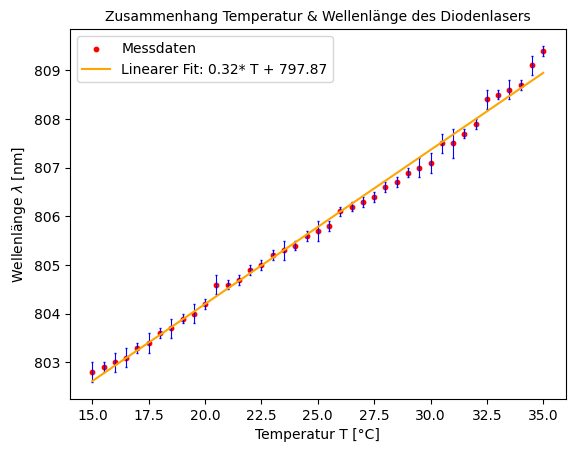

In [71]:
plt.errorbar(tlam[:,0],tlam[:,1],yerr=tlam[:,2],linestyle="",capsize=1,c="blue",elinewidth=0.8)
plt.scatter(tlam[:,0],tlam[:,1],s=10,c="red",label="Messdaten")
plt.plot(tlam[:,0],popt[0]*tlam[:,0]+popt[1],color="orange",label="Linearer Fit: "+str(round(popt[0],2))+"* T + "+str(round(popt[1],5)))
plt.legend(loc=0)
plt.ylabel(r"Wellenlänge $\lambda$ [nm]")
plt.xlabel(r"Temperatur T [°C]")
plt.title("Zusammenhang Temperatur & Wellenlänge des Diodenlasers",fontsize=10)
plt.savefig("Plots/Temperatur_Wellenlänge_Diode.pdf")

In [ ]:
plt.plot(puls1[:,0],puls1[:,1])
plt.show()
plt.plot(puls2[:,0],puls2[:,1])
plt.show()